In [4]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn import datasets

In [6]:
x, y = datasets.make_classification(
  n_samples = 6, n_features= 2, n_classes=2, random_state=25,
  n_informative=1, n_redundant=0, n_clusters_per_class=1,
)

In [7]:
sample = pd.DataFrame( np.c_[y, x], columns=['y', 'x1', 'x2'] )
sample

,y,x1,x2
0,1.0,-0.232312,1.073766
1,1.0,-1.334661,1.027741
2,1.0,2.152957,1.119398
3,0.0,-0.920734,-1.310594
4,0.0,-2.053231,-0.915553
5,0.0,0.868583,-0.620115


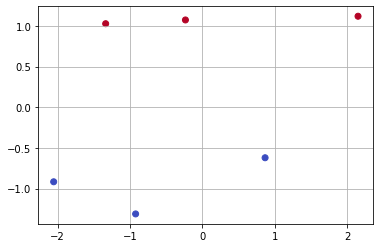

In [8]:
plt.scatter( sample['x1'], sample['x2'], c=sample['y'], cmap='coolwarm' )
plt.grid()
plt.show()

## 분류모형에서의 평가 방법
- 최대가능도
- Cross-Entropy
- 일반적으로 분류모형에서 사용하는 최대가능도의 함수는 다음과 같습니다. 

$$
  L = \sum_i - y_i log(\hat y_i) - (1 - y_i)log(1-\hat y_i)
$$

- 수업시간에는 크로스엔트로피의 수학적인 의미보다는, 어떻게 동작하는지를 확인해 봅니다.
- 다음과 같이 확률이 계산되었다고 가정

| Y | x1 | x2 | [1, 0] |
|:---:|:---:|:---:|:---:|
| 1 | -0.23... |1.07...|[0.7, 0.3]|
| 1 | -1.33...|1.02...|[0.1, 0.9]|
| 1 | 2.15...|1.11...|[0.8, 0.2]|
| 0 | -0.92...|-1.31...|[0.1, 0.9]|
| 0 | -2.05...|-0.91...|[0.2, 0.8]|
| 0 | 0.86...|-0.62...|[0.9, 0.1]|


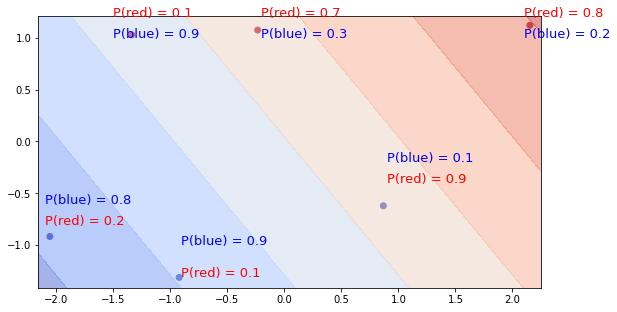

In [9]:
xy1, xy2 = np.meshgrid(
    np.arange(x[:,0].min() - 0.1, x[:,0].max() + 0.1, 0.01), 
    np.arange(x[:,1].min() - 0.1 , x[:,1].max() + 0.1 , 0.01)
)

plt.figure( figsize=(9,5) )
beta = np.array([20, 15])
xx = np.c_[xy1.flatten(), xy2.flatten()]
yhat = np.dot(xx, beta) + -0.7
plt.annotate('P(blue) = 0.9', (-1.5, 1.0), c='b', fontsize=13)
plt.annotate('P(red) = 0.1', (-1.5, 1.2), c='r', fontsize=13)
plt.annotate('P(blue) = 0.8', (-2.1, -0.6), c='b', fontsize=13)
plt.annotate('P(red) = 0.2', (-2.1, -0.8), c='r', fontsize=13)
plt.annotate('P(blue) = 0.9', (-0.9, -1.0), c='b', fontsize=13)
plt.annotate('P(red) = 0.1', (-0.9, -1.3), c='r', fontsize=13)
plt.annotate('P(blue) = 0.1', (0.9, -0.2), c='b', fontsize=13)
plt.annotate('P(red) = 0.9', (0.9, -0.4), c='r', fontsize=13)
plt.annotate('P(blue) = 0.3', (-0.2, 1.0), c='b', fontsize=13)
plt.annotate('P(red) = 0.7', (-0.2, 1.2), c='r', fontsize=13)
plt.annotate('P(blue) = 0.2', (2.1, 1.0), c='b', fontsize=13)
plt.annotate('P(red) = 0.8', (2.1, 1.2), c='r', fontsize=13)
plt.scatter(x[:,0], x[:,1], c = y, cmap='coolwarm')
plt.contourf(xy1, xy2, yhat.reshape(xy1.shape), cmap='coolwarm', alpha=0.5)
plt.show()

- 위와 같이 확률들이 추정되었을 때 최대가능도를 직접 계산
- 식 자체는 거창해 보이지만, 1을 1로 추정한 확률과 0을 0으로 추정한 확률의 MLE을 표현

$$
  L = \sum_i - y_i log(\hat y_i) - (1 - y_i)log(1-\hat y_i)
$$

| Y | x1 | x2 | [1, 0] |
|:---:|:---:|:---:|:---:|
| 1 | -0.23... |1.07...|[0.7, 0.3]|
| 1 | -1.33...|1.02...|[0.1, 0.9]|
| 1 | 2.15...|1.11...|[0.8, 0.2]|
| 0 | -0.92...|-1.31...|[0.1, 0.9]|
| 0 | -2.05...|-0.91...|[0.2, 0.8]|
| 0 | 0.86...|-0.62...|[0.9, 0.1]|

In [10]:
- 1*np.log(0.7) - (1-1)*np.log(0.3) \
- 1*np.log(0.1) - (1-1)*np.log(0.9) \
- 1*np.log(0.8) - (1-1)*np.log(0.2) \
- 0*np.log(0.1) - (1-0)*np.log(0.9) \
- 0*np.log(0.2) - (1-0)*np.log(0.8) \
- 0*np.log(0.9) - (1-0)*np.log(0.1) 

5.51349274821307

In [11]:
- 1*np.log(0.7) + \
- 1*np.log(0.1) + \
- 1*np.log(0.8) + \
- (1-0)*np.log(0.9) + \
- (1-0)*np.log(0.8) + \
- (1-0)*np.log(0.1) 

5.51349274821307

In [12]:
0.7 * 0.1 * 0.8 * 0.9 * 0.8 * 0.1

0.004032

In [13]:
np.log(0.7) + np.log(0.1) + np.log(0.8) + np.log(0.9) + np.log(0.8) + np.log(0.1)

-5.51349274821307

In [14]:
-(np.log(0.7) + np.log(0.1) + np.log(0.8) + np.log(0.9) + np.log(0.8) + np.log(0.1))

5.51349274821307

## 직접 추정
- 분류모형에서의 최적화를 직접 수행
- logit 함수와 cross entropy 정의

In [15]:
from scipy.optimize import minimize

def logit(x):
  return 1 / (1+np.exp(-x))

def cross_entropy(beta):
  yhat = logit(beta[0] + beta[1]*sample['x1'] + beta[2]*sample['x2'])
  return np.sum(-y*np.log(yhat) - (1-y)*np.log(1-yhat))

In [16]:
beta = [0, 0, 0]
result = minimize(cross_entropy, beta)
result.x

array([-2.53524181, -0.71598003, 14.82702594])

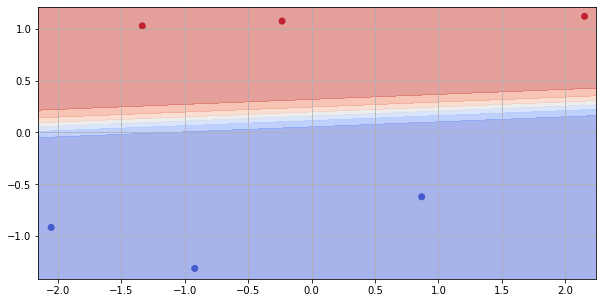

In [17]:
xy1, xy2 = np.meshgrid(
    np.arange(x[:,0].min()-0.1, x[:,0].max()+0.1, 0.01), 
    np.arange(x[:,1].min()-0.1 , x[:,1].max()+0.1, 0.01)
)

beta = result.x
xx = np.c_[xy1.flatten(), xy2.flatten()]
yhat = logit(np.dot(xx, beta[1:])+ beta[0])

plt.figure(figsize=(10, 5))
plt.scatter(sample['x1'], sample['x2'], c=sample['y'], cmap='coolwarm')
plt.contourf(xy1, xy2, yhat.reshape(xy1.shape), cmap='coolwarm', alpha=0.5)
plt.grid()
plt.show()

In [18]:
xy1.flatten()

array([-2.15323076, -2.14323076, -2.13323076, ...,  2.22676924,
        2.23676924,  2.24676924])

# 현실적인 샘플
- 불균형 데이터
- 가장 이상적인 형태는 비율이 5:5 정도가 가장 이상적인 형태가 됩니다.
- 하지만 현실적으로는 그럴수가 없기 때문에 불균형 데이터를 가정해서 실습을 진행합니다. 

In [19]:
x, y = datasets.make_classification(
  n_samples = 1000, weights=[0.9, 0.1], n_features= 2, n_classes=2, random_state=25,
  n_informative=1, n_redundant=0, n_clusters_per_class=1,
)

In [20]:
sample = np.c_[y, x]
sample = pd.DataFrame(sample, columns=['y', 'x1', 'x2'])
sample.head(2)

,y,x1,x2
0,0.0,1.568390,-0.341790
1,0.0,-0.001372,-2.044255


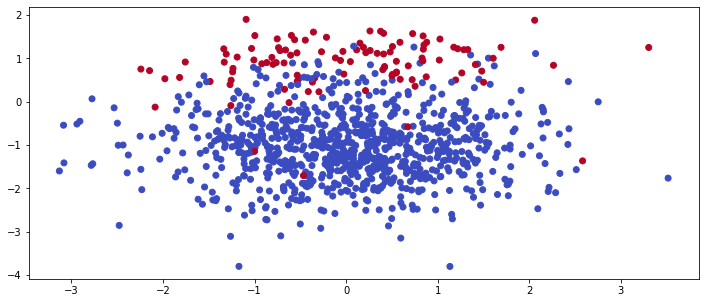

In [21]:
plt.figure(figsize=(12,5))
plt.scatter(sample['x1'], sample['x2'], c=sample['y'], cmap='coolwarm')
plt.show()

## 직접 추정

In [22]:
beta = [0, 0, 0]
result = minimize(cross_entropy, beta)
result.x

array([-2.22542567, -0.19049369,  3.3843793 ])

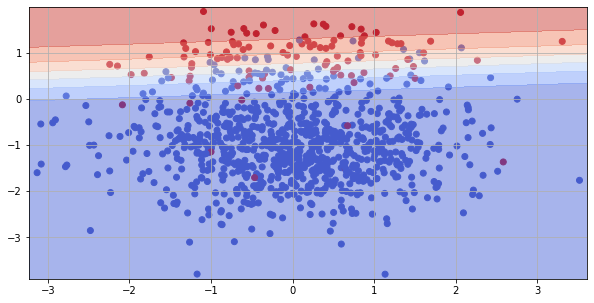

In [23]:
xy1, xy2 = np.meshgrid(
    np.arange(x[:,0].min()-0.1, x[:,0].max()+0.1, 0.01), 
    np.arange(x[:,1].min()-0.1 , x[:,1].max()+0.1, 0.01)
)

beta = result.x
xx = np.c_[xy1.flatten(), xy2.flatten()]
yhat = logit(np.dot(xx, beta[1:])+ beta[0])

plt.figure(figsize=(10, 5))
plt.scatter(sample['x1'], sample['x2'], c=sample['y'], cmap='coolwarm')
plt.contourf(xy1, xy2, yhat.reshape(xy1.shape), cmap='coolwarm', alpha=0.5)
plt.grid()
plt.show()

# 분류모형에서의 평가 방법

| - | Y_true(0) | Y_true(1) |
|:---:|:---:|:---:|
| Y_predict(0) | TN <br> 실제: 0 <br> 예측: 0 | FP <br> 실제: 1 <br> 예측: 0 |
| Y_predict(1) | FN <br> 실제: 0 <br> 예측: 1 | TP <br> 실제: 1 <br> 예측: 1 |

---

1. Accuracy(정확도)
  - 전체 자료에서 TP와 TN의 비율

$$
    \frac{TP + TN}{TP + TN + FP + FN}
$$
- 데이터의 불균형이 심한 경우에는 정확한 지표로 삼기 어렵다. 
- TP의 갯수가 압도적으로 높으면, TN의 오분류가 많아도 제대로 반영이 되지 않는다. 

---

2. precision(정밀도)
  - 0을 0으로 예측한 데이터 중에 실제 0이었던 데이터의 비율

$$
    \frac{TP}{TP + FP}
$$

---

3. recall(재현율)
  - 실제 0이었던 데이터 중에 0으로 예측한 비율

$$
    \frac{TP}{TP + FN}
$$

---

4. F-1 Score
  - 정밀도와 재현율의 조화평균

$$
    f1 = 2 \cdot \frac{precision \cdot recall}{precision\; + \;recall}
$$

- 정밀도 재현율을 모두 반영한 점수
- 데이터의 불균형이 심한 경우에도 정확한 지표로 삼을 수 있다. 

## Confusion M

In [24]:
def cut_off(y, threshold):
  y = y.copy()
  y[y > threshold] = 1
  y[y < threshold] = 0
  
  return y.astype(int)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
y_predict = logit(beta[0] + beta[1]*sample['x1'] + beta[2]*sample['x2'])
y_predict = cut_off(y_predict, 0.5)
cmat = confusion_matrix(y, y_predict)
cmat

array([[877,  18],
       [ 33,  72]])

## Accuracy

In [27]:
(cmat[0, 0]+cmat[1,1]) / np.sum(cmat)

0.949

## Precision

In [28]:
precision = cmat[1, 1] / (cmat[0,1]+cmat[1,1])
precision

0.8

## recall

In [29]:
recall = cmat[1, 1] / (cmat[1,0]+cmat[1,1])
recall

0.6857142857142857

## F1 score

In [30]:
2 * (precision*recall)/(precision+recall)

0.7384615384615385

## ROC Curve

In [31]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

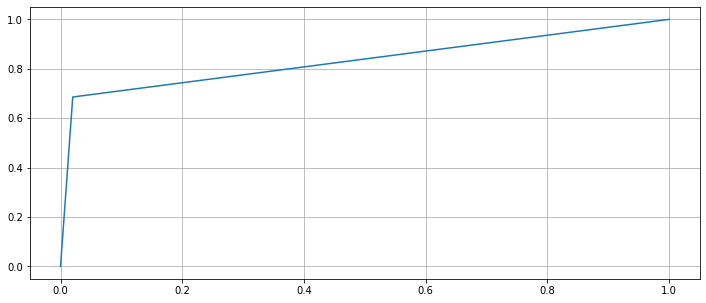

In [32]:
fpr, tpr, _ = roc_curve(y, y_predict)

plt.figure(figsize=(12, 5))
plt.plot(fpr, tpr)
plt.grid()
plt.show()

In [33]:
roc_auc_score(y, y_predict)

0.8328012769353552

# 과적합(Overfit)
- 과적합을 완벽하게 없앨 수 있는 방법은 아직까지는 없습니다.
- 과적합을 줄일 수 있는 잘 알려진 방법
  1. 자료의 양을 늘리는 방법(현실적인 어려움이 있다.)
  2. 다중공선성을 줄이는 방법
  3. 모형의 복잡도를 줄이는 방법(변수 선택법)
    - 변수가 많으면 많을수록 정확도는 높아지는 경향이 있다.
    - 모형이 복잡할수록 정확도는 높아집니다.(과적합도 같이 높아진다)
  4. 회귀계수를 줄이는 방법

In [34]:
train = pd.read_csv('/content/sample_data/california_housing_train.csv')
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [35]:
test = pd.read_csv('/content/sample_data/california_housing_test.csv')
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


# 다중공선성
- 상관관계 
  - 입력변수 X들은 독립적임을 가정(독립변수)
  - 상관계수를 통해서 확인

- 인과관계
  - 입력변수 X들은 다른 입력변수들과 인과관계가 없어야 합니다.
  - 타겟변수를 제외하고, 입력변수들간의 선형회귀를 해보게 됩니다.

In [36]:
features = train.drop(columns=['median_house_value', 'longitude', 'latitude'])

In [37]:
features.corr().style.background_gradient().set_precision(2)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
housing_median_age,1.00,-0.36,-0.32,-0.30,-0.30,-0.12
total_rooms,-0.36,1.00,0.93,0.86,0.92,0.20
total_bedrooms,-0.32,0.93,1.00,0.88,0.98,-0.01
population,-0.30,0.86,0.88,1.00,0.91,-0.00
households,-0.30,0.92,0.98,0.91,1.00,0.01
median_income,-0.12,0.20,-0.01,-0.00,0.01,1.00


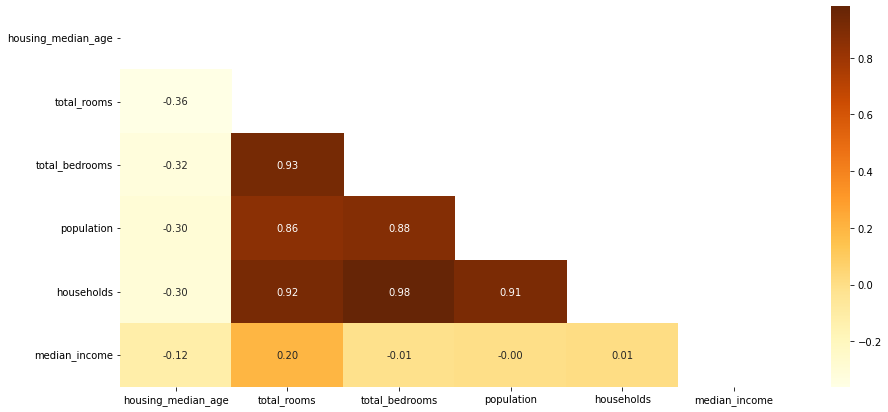

In [38]:
plt.figure(figsize=(15, 7))
mask = np.zeros_like(features.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(features.corr(), annot=True, fmt='.2f', mask=mask, cmap='YlOrBr')
plt.show()

## 인과관계
- VIF
- 각 입력변수들을 타겟으로 놓고 선형회귀를 한 결과
  - vif 점수가 높으면 높을 수록 인과관계가 높다고 판단
  - 보수적: 3 이상 이면 관계가 높다고 판단
  - 10 까지는 포함하는 경우도 있습니다. 

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
vifFrame = pd.DataFrame()
vifFrame['VIF factor'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vifFrame['features'] = features.columns
vifFrame

,VIF factor,features
0,3.574735,housing_median_age
1,27.014005,total_rooms
2,89.215256,total_bedrooms
3,15.802222,population
4,95.172568,households
5,4.805563,median_income


In [43]:
features = train.drop(columns=['median_house_value', 'longitude', 'latitude', 'households', 'total_bedrooms', 'total_rooms'])

vifFrame = pd.DataFrame()
vifFrame['VIF factor'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vifFrame['features'] = features.columns
vifFrame

,VIF factor,features
0,2.885765,housing_median_age
1,2.027615,population
2,3.344828,median_income


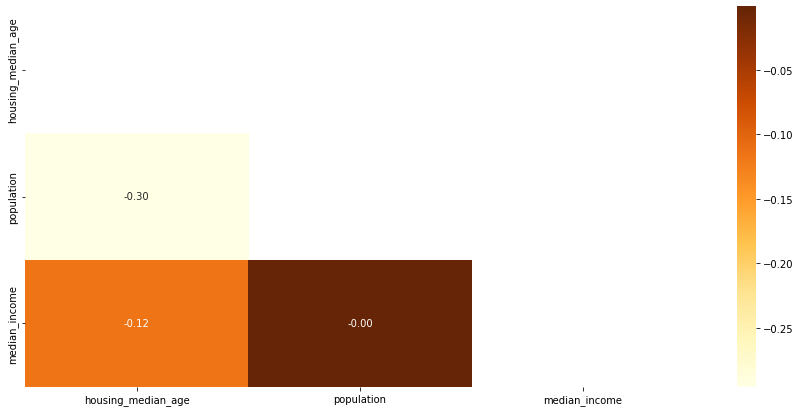

In [44]:
plt.figure(figsize=(15, 7))
mask = np.zeros_like(features.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(features.corr(), annot=True, fmt='.2f', mask=mask, cmap='YlOrBr')
plt.show()

## 다중선형회귀 실습

### 모든 변수를 전부 사용한 경우

In [46]:
X_train = train.drop(columns=['median_house_value', 'longitude', 'latitude'])
y_train = train['median_house_value']

X_test = test.drop(columns=['median_house_value', 'longitude', 'latitude'])
y_test = test['median_house_value']

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### 회귀계수

In [49]:
print(model.coef_)
print(X_train.columns)

[ 1.88001408e+03 -1.99559207e+01  9.95247716e+01 -3.50182347e+01
  1.27225320e+02  4.80334593e+04]
Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income'],
      dtype='object')


In [50]:
pd.DataFrame( np.array([ model.coef_, X_train.columns ]).T, columns=['coef', 'features'] )

,coef,features
0,1880.014083,housing_median_age
1,-19.955921,total_rooms
2,99.524772,total_bedrooms
3,-35.018235,population
4,127.22532,households
5,48033.459277,median_income


#### 결정계수

In [52]:
model.score(X_train, y_train)

0.5713482748283873

In [54]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_train)
r2_score(y_train, y_pred)

0.5713482748283873

#### 잔차의 분포

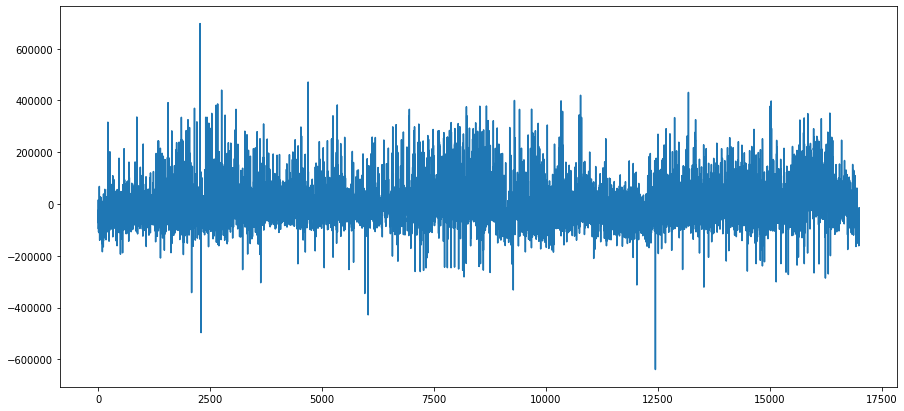

In [58]:
residual = y_train - y_pred

plt.figure(figsize=(15, 7))
plt.plot(residual)
plt.show()

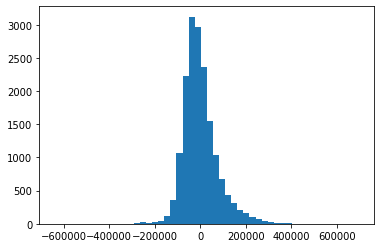

In [60]:
plt.hist(residual, bins=50)
plt.show()

### 다중공선성을 제거한 경우

In [61]:
X_train = train.drop(columns=['median_house_value', 'longitude', 'latitude', 'households', 'total_bedrooms', 'total_rooms'])
y_train = train['median_house_value']

X_test = test.drop(columns=['median_house_value', 'longitude', 'latitude', 'households', 'total_bedrooms', 'total_rooms'])
y_test = test['median_house_value']

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### 회귀계수

In [63]:
pd.DataFrame( np.array([ model.coef_, X_train.columns ]).T, columns=['coef', 'features'] )

,coef,features
0,1833.310985,housing_median_age
1,3.180376,population
2,43457.282207,median_income


#### 결정계수

In [65]:
model.score(X_train, y_train)

0.5150206852133975

# 변수선택법
- 가장 적은 변수로 높은 정확도를 낼 수 있다면? 제일 좋은 모형이라고 얘기할 수 있습니다. 
- 어떤 변수를 사용하는것이 제일 좋을까?
  - 가장 좋은 방법은 변수들의 모든 조합을 전부 확인
  - 현실적으로 불가능한 방법

- 몇가지 현실적인 방법
  - 전진선택법(forward select)
  - 후진제거법(backward drop)
  - 단계적 선택법(step-wise select)/ 전진 + 후진

- 파이썬에서는 직접 구현해서 사용을 해야 합니다.

## 노이즈 데이터
- 정말 잘 선택이 되는지 확인을 위해서 아무 의미없는 랜덤한 값을 생성해서 변수로 추가
- 집값 하고는 아무 관련이 없는 자료를 섞어놓고 잘 선택되는지 확인해봅시다. 

In [68]:
X_train = train.drop( columns=['median_house_value', 'longitude', 'latitude'])
y_train = train['median_house_value']

X_test = test.drop( columns=['median_house_value', 'longitude', 'latitude'])
y_test = test['median_house_value']

In [69]:
np.random.seed(123)

colname = np.array([f'random_{i}' for i in range(1, 11)])
randFrame = pd.DataFrame( np.random.randint(1, 100, size=(17000, 10)), columns=colname)

X_train = pd.concat([X_train, randFrame], axis=1)
X_train.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,random_1,random_2,random_3,random_4,random_5,random_6,random_7,random_8,random_9,random_10
0,15.0,5612.0,1283.0,1015.0,472.0,1.4936,67,93,99,18,84,58,87,98,97,48
1,19.0,7650.0,1901.0,1129.0,463.0,1.8200,74,33,47,97,26,84,79,37,97,81
2,17.0,720.0,174.0,333.0,117.0,1.6509,69,50,56,68,3,85,40,67,85,48
3,14.0,1501.0,337.0,515.0,226.0,3.1917,62,49,8,93,53,98,86,95,28,35
4,20.0,1454.0,326.0,624.0,262.0,1.9250,98,77,41,4,70,65,76,35,59,11


## 전진선택법
- 아무것도 없는 모형에서, 변수를 하나씩 추가하면서 정확도가 가장 높은 변수를 고르는 방법 
  - R2는 변수가 추가될 때마다 정확도가 올라갈 수 있기 때문에
  - Adj.R2 이용해서 변수를 선택해보도록 하겠습니다.

In [70]:
def adjustedR2(r2, x):
  if x.ndim == 1: 
    p, n = 1, x.shape[0]
  else: 
    p, n = x.shape[1], x.shape[0]

  return 1 - (1-r2) * (n-1) / (n-p-1)

In [76]:
def forward(x, y, selected_columns):
  forward_columns = [col for col in X_train.columns if col not in selected_columns]
  result = []

  for col in forward_columns:
    columns = selected_columns + [col]
    model = LinearRegression()
    model.fit(x[columns], y)
    r2 = model.score(x[columns], y)
    adjr2 = adjustedR2(r2, x[columns])
    result.append({'score':adjr2, 'features':columns})

  tmp = pd.DataFrame(result)
  best = tmp.loc[tmp.score.argmax()]

  return best

In [94]:
def forward_select(x, y):
  selected_columns = []

  for i in range(0, x.shape[1]):
    model = forward(x, y, selected_columns)

    if i == 0:
      best_model = model
    else:
      if best_model.score < model.score:
        best_model = model
      else:
        break

    selected_columns = best_model.features

  return best_model

In [82]:
selected_columns = ['median_income', 'housing_median_age', 'total_bedrooms', 'population', 'total_rooms', 'households', 'random_3']
ret = forward(X_train, y_train, selected_columns )
print(ret['score'])
print(ret['features'])

0.5713196236325444
['median_income', 'housing_median_age', 'total_bedrooms', 'population', 'total_rooms', 'households', 'random_3', 'random_6']


In [95]:
ret = forward_select(X_train, y_train)
print(ret.score)
print(ret.features)

0.5713196236325444
['median_income', 'housing_median_age', 'total_bedrooms', 'population', 'total_rooms', 'households', 'random_3', 'random_6']


## 후진 제거법
- 모든 변수를 전부 선택한 상황에서 변수를 하나씩 제거했을 때, 가장 높은 정확도의 변수를 제거
  - 설명력이 낮은 변수를 하나씩 제거하면서 진행

In [96]:
from itertools import combinations

In [97]:
selected_columns = X_train.columns

for combi in combinations(selected_columns, len(selected_columns)- 1):
  print(combi)

('housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'random_1', 'random_2', 'random_3', 'random_4', 'random_5', 'random_6', 'random_7', 'random_8', 'random_9')
('housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'random_1', 'random_2', 'random_3', 'random_4', 'random_5', 'random_6', 'random_7', 'random_8', 'random_10')
('housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'random_1', 'random_2', 'random_3', 'random_4', 'random_5', 'random_6', 'random_7', 'random_9', 'random_10')
('housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'random_1', 'random_2', 'random_3', 'random_4', 'random_5', 'random_6', 'random_8', 'random_9', 'random_10')
('housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'random_1', 'random_2', 'random_3', 'random_4', 'random_5', 

In [98]:
def backward(x, y, selected_columns):
  result = []

  for combi in combinations(selected_columns, len(selected_columns)- 1):
    columns = list(combi)
    model = LinearRegression()
    model.fit(x[columns], y)
    r2 = model.score(x[columns], y)
    adjr2 = adjustedR2(r2, x[columns])
    result.append({'score':adjr2, 'features':columns})

  tmp = pd.DataFrame(result)
  best = tmp.loc[tmp.score.argmax()]

  return best

In [105]:
def backward_select(x, y):
  selected_columns = x.columns

  for i in range(0, x.shape[1]):
    model = backward(x, y, selected_columns)

    if i == 0:
      best_model = model
    else:
      if best_model.score < model.score:
        best_model = model
      else:
        break

    selected_columns = best_model.features

  return best_model

In [100]:
selected_columns = X_train.columns
ret = backward(X_train, y_train, selected_columns)
print(ret.score)
print(ret.features)

0.5711876969948524
['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'random_1', 'random_2', 'random_3', 'random_4', 'random_5', 'random_6', 'random_7', 'random_8', 'random_9']


In [103]:
selected_columns = ret.features
ret = backward(X_train, y_train, selected_columns)
print(ret.score)
print(ret.features)

0.5712575940172544
['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'random_1', 'random_2', 'random_3', 'random_5', 'random_6', 'random_8']


In [106]:
ret = backward_select(X_train, y_train)
print(ret.score)
print(ret.features)

0.5713196236325442
['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'random_3', 'random_6']


## 단계적 선택법
- 매 단계마다 선택과 제거를 동시에 수행하고 가장 좋은 결과를 주는 방법을 선택

In [109]:
def step_wise(x, y):
  selected_columns = []

  for i in range(0, x.shape[1]):
    forward_model = forward(x, y, selected_columns )
    selected_columns = forward_model.features

    if i < 2:
      best_model = forward_model
      continue

    backward_model = backward(x, y, selected_columns)
    large_model = forward_model
    
    if forward_model.score < backward_model.score:
      large_model = backward_model
      selected_columns = backward_model.features
    
    if best_model.score < large_model.score:
      best_model = large_model
    else: break
  
  return best_model

In [110]:
ret = step_wise(X_train, y_train)
print(ret.score)
print(ret.features)

0.5713196236325444
['median_income', 'housing_median_age', 'total_bedrooms', 'population', 'total_rooms', 'households', 'random_3', 'random_6']


# 변수의 설명력
- 시각화를 통해서 변수들의 영향력을 확인
- 선형회귀 같은 경우는 회귀계수를 통해서 확인

## eli5

In [113]:
!pip install eli5 shap

     |████████████████████████████████| 106 kB 17.4 MB/s 
     |████████████████████████████████| 564 kB 25.7 MB/s 


In [114]:
import eli5
from eli5.sklearn import PermutationImportance

import shap

노이즈를 포함한 전체 데이터를 이용하여 선형회귀

In [115]:
X_train.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,random_1,random_2,random_3,random_4,random_5,random_6,random_7,random_8,random_9,random_10
0,15.0,5612.0,1283.0,1015.0,472.0,1.4936,67,93,99,18,84,58,87,98,97,48
1,19.0,7650.0,1901.0,1129.0,463.0,1.8200,74,33,47,97,26,84,79,37,97,81
2,17.0,720.0,174.0,333.0,117.0,1.6509,69,50,56,68,3,85,40,67,85,48
3,14.0,1501.0,337.0,515.0,226.0,3.1917,62,49,8,93,53,98,86,95,28,35
4,20.0,1454.0,326.0,624.0,262.0,1.9250,98,77,41,4,70,65,76,35,59,11


In [116]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [118]:
eli5.show_weights(model, feature_names=X_train.columns.tolist())

Weight?,Feature
+48019.614,median_income
+1880.378,housing_median_age
+127.320,households
+99.355,total_bedrooms
+40.816,random_3
+33.901,random_6
+12.490,random_5
+12.076,random_8
+8.892,random_4
+3.402,random_7


## permutation importance
- 변수들을 무작위로 섞어서 점수를 계산
- 점수가 크게 떨어지거나, 변하면 항목이 중요하다는 의미로 해석

In [119]:
perm = PermutationImportance(model, random_state=123).fit(X_train, y_train)
eli5.show_weights(perm, feature_names=X_train.columns.tolist())

Weight,Feature
1.2508 ± 0.0225,median_income
0.3576 ± 0.0088,households
0.2801 ± 0.0049,total_rooms
0.2603 ± 0.0064,total_bedrooms
0.2358 ± 0.0086,population
0.0843 ± 0.0055,housing_median_age
0.0002 ± 0.0002,random_3
0.0001 ± 0.0001,random_6
0.0000 ± 0.0000,random_2
0.0000 ± 0.0001,random_8


## shap

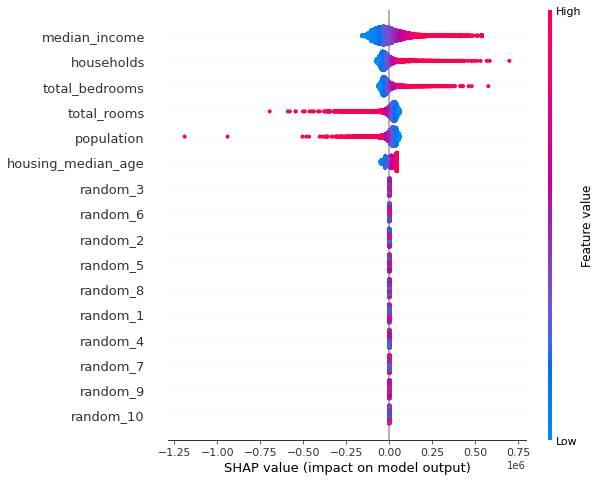

In [122]:
explainer = shap.LinearExplainer(model, X_train)
shap_value = explainer.shap_values(X_train)
shap.summary_plot(shap_value, X_train)

## Recursive Feature Elimination
- 후진제거법과 동일한 방식으로 진행
- 전체 변수에서 원하는 개수의 변수가 남을 때까지, 변수를 하나씩 제거하면서 중요도를 계산

In [123]:
from sklearn.feature_selection import RFE
from sklearn import feature_selection

In [125]:
feature_selector = RFE(model, n_features_to_select=4)
feature_selector = feature_selector.fit(X_train, y_train)
feature_selector.n_features_

4

In [126]:
feature_selector.support_

array([ True, False, False, False,  True,  True, False, False,  True,
       False, False, False, False, False, False, False])

In [127]:
X_train.columns[feature_selector.support_]

Index(['housing_median_age', 'households', 'median_income', 'random_3'], dtype='object')

# 정규화(Regularization)
- 회귀계수를 줄이는 방법
  1. Ridge
    - L2 Regularization

  2. Lasso
    - L1 Regularization

In [148]:
np.random.seed(123)

x = np.linspace(0, 1, 1000)
y = np.sin(2 * np.pi * x) + (np.random.randn(1000)/5)

x_train = np.linspace(0, 1, 10)
y_train = np.sin(2 * np.pi * x_train) + (np.random.randn(10)/5)

x_test = np.linspace(0, 1, 50)
y_test = np.sin(2 * np.pi * x_test) + (np.random.randn(50)/5)

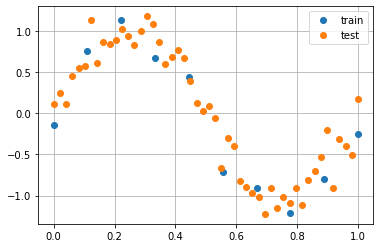

In [149]:
plt.plot( x_train, y_train, 'o', label='train' )
plt.plot( x_test, y_test, 'o', label='test' )
plt.legend()
plt.grid()
plt.show()

In [150]:
train = pd.DataFrame( np.array([ y_train, x_train]).T, columns=['target', 'x'])
test = pd.DataFrame( np.array([ y_test, x_test]).T, columns=['target', 'x'])
df = pd.DataFrame( np.array([y, x]).T, columns=['target', 'x'] )

In [151]:
train['x2'] = train['x'] ** 2
train['x3'] = train['x'] ** 3
train['x4'] = train['x'] ** 4
train['x5'] = train['x'] ** 5
train['x6'] = train['x'] ** 6
train['x7'] = train['x'] ** 7
train['x8'] = train['x'] ** 8
train['x9'] = train['x'] ** 9

In [152]:
test['x2'] = test['x'] ** 2
test['x3'] = test['x'] ** 3
test['x4'] = test['x'] ** 4
test['x5'] = test['x'] ** 5
test['x6'] = test['x'] ** 6
test['x7'] = test['x'] ** 7
test['x8'] = test['x'] ** 8
test['x9'] = test['x'] ** 9

In [153]:
df['x2'] = df['x'] ** 2
df['x3'] = df['x'] ** 3
df['x4'] = df['x'] ** 4
df['x5'] = df['x'] ** 5
df['x6'] = df['x'] ** 6
df['x7'] = df['x'] ** 7
df['x8'] = df['x'] ** 8
df['x9'] = df['x'] ** 9

In [154]:
model = LinearRegression()
model.fit(train.loc[:,'x':], train['target'])

LinearRegression()

In [155]:
model.coef_

array([-1.70045741e+02,  4.15689626e+03, -3.76318383e+04,  1.76520228e+05,
       -4.80060685e+05,  7.84783001e+05, -7.59967118e+05,  4.01450695e+05,
       -8.90812387e+04])

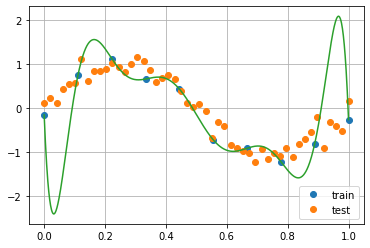

In [156]:
plt.plot( x_train, y_train, 'o', label='train' )
plt.plot( x_test, y_test, 'o', label='test' )
plt.plot( df['x'], model.predict( df.loc[:, 'x':] ) )
plt.legend()
plt.grid()
plt.show()

## Ridge Regression
- 추정되는 회귀 계수가 특정 값을 넘지 못하도록 억제

$$
  f(x) = \sum_{i=1}^n (y_i - (\beta_1x_i + \beta_0))^2 + \lambda \sum_{k=1}^k \beta_k^2
$$

- 람다가 너무 작으면, 정규화의 의미가 없고
- 람다가 너무 크면, 오히려 **과소적합** 되는 상황이 발생
- 적절한 람다 값을 찾아야 합니다.

In [157]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

람다가 0이면 정규화를 하지 않은 것과 동일

In [158]:
model = Ridge(alpha=0)
model.fit(train.loc[:,'x':], train['target'])

Ridge(alpha=0)

In [159]:
model.coef_

array([-1.70256390e+02,  4.16174381e+03, -3.76753255e+04,  1.76723705e+05,
       -4.80612926e+05,  7.85684103e+05, -7.60838368e+05,  4.01910345e+05,
       -8.91831263e+04])

람다가 너무 크면 과소적합

In [160]:
model = Ridge(alpha=1000)
model.fit(train.loc[:,'x':], train['target'])
model.coef_

array([-0.00162745, -0.0016414 , -0.0014025 , -0.00116401, -0.00096785,
       -0.00081342, -0.00069267, -0.00059775, -0.00052242])

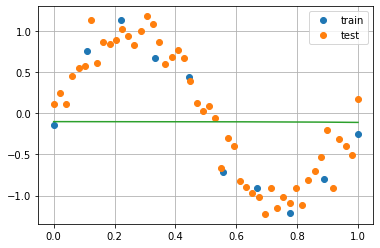

In [161]:
plt.plot( x_train, y_train, 'o', label='train' )
plt.plot( x_test, y_test, 'o', label='test' )
plt.plot( df['x'], model.predict( df.loc[:, 'x':] ) )
plt.legend()
plt.grid()
plt.show()

In [166]:
model = Ridge(alpha=0.0001)
model.fit(train.loc[:,'x':], train['target'])
model.coef_

array([  9.70407155, -21.46596941,  -2.17514469,   7.38851398,
         7.99232366,   4.76481903,   0.80569197,  -2.49305767,
        -4.68910907])

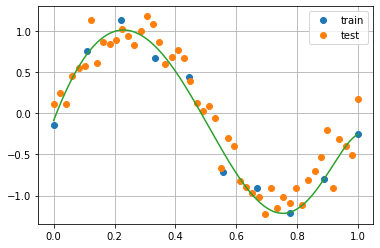

In [167]:
plt.plot( x_train, y_train, 'o', label='train' )
plt.plot( x_test, y_test, 'o', label='test' )
plt.plot( df['x'], model.predict( df.loc[:, 'x':] ) )
plt.legend()
plt.grid()
plt.show()

## Lasso Regression

$$
  f(x) = \sum_{i=1}^n (y_i - (\beta_1x_i + \beta_0))^2 + \lambda \sum_{k=1}^k |\beta_k|
$$

- 회귀계수를 0으로 만드는 성질이 있어요
  - 회귀계수가 0이 되면 해당 변수가 반영이 안됩니다.
  - 그렇기 때문에, 자기 스스로 변수를 선택하는 알고리즘을 알려져 있습니다. 

In [168]:
model = Lasso(alpha=0.0001)
model.fit(train.loc[:,'x':], train['target'])
model.coef_

array([  9.99472818, -25.03382025,   4.52317805,   7.82668253,
         4.73926381,   1.56152158,   0.        ,  -1.01190095,
        -2.77192694])

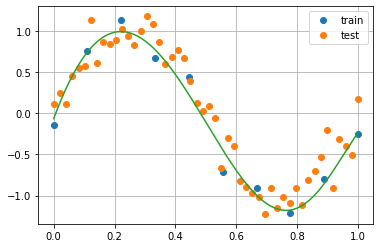

In [169]:
plt.plot( x_train, y_train, 'o', label='train' )
plt.plot( x_test, y_test, 'o', label='test' )
plt.plot( df['x'], model.predict( df.loc[:, 'x':] ) )
plt.legend()
plt.grid()
plt.show()

## Elastic Net
- Ridge와 Lasso의 특징을 동시에 사용할 수 있습니다.

In [170]:
model = ElasticNet(alpha=0.0001, l1_ratio=1)
model.fit(train.loc[:,'x':], train['target'])
model.coef_

array([  9.99472818, -25.03382025,   4.52317805,   7.82668253,
         4.73926381,   1.56152158,   0.        ,  -1.01190095,
        -2.77192694])

In [171]:
model = ElasticNet(alpha=0.0001, l1_ratio=0)
model.fit(train.loc[:,'x':], train['target'])
model.coef_

array([  7.0382349 , -15.23088979,  -3.22504957,   5.0697742 ,
         5.99047493,   3.59344782,   0.76657088,  -1.43473491,
        -2.86389409])

In [172]:
model = ElasticNet(alpha=0.0001, l1_ratio=0.5)
model.fit(train.loc[:,'x':], train['target'])
model.coef_

array([ 8.27630959e+00, -1.91303418e+01, -6.86925858e-01,  6.70049034e+00,
        5.82244816e+00,  2.70876936e+00,  7.00943367e-04, -1.15701647e+00,
       -2.77825561e+00])

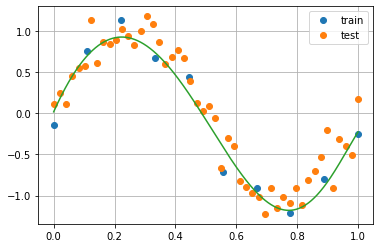

In [173]:
plt.plot( x_train, y_train, 'o', label='train' )
plt.plot( x_test, y_test, 'o', label='test' )
plt.plot( df['x'], model.predict( df.loc[:, 'x':] ) )
plt.legend()
plt.grid()
plt.show()